In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


Part 1: Regression Task (California Housing)

3.1 Task 1: Load and Split Dataset

In [ ]:
import pandas as pd
import kagglehub
from sklearn.model_selection import train_test_split

# Download the dataset
path = kagglehub.dataset_download("camnugent/california-housing-prices")
print("Path to dataset files:", path)

# Load the dataset into a DataFrame
import os
housing_data_path = os.path.join(path, "housing.csv")
df = pd.read_csv(housing_data_path)

# Display the first few rows of the dataset
df.head()
# Split the dataset into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Using Colab cache for faster access to the 'california-housing-prices' dataset.
Path to dataset files: /kaggle/input/california-housing-prices


Task 2: Handle Missing Data and Feature Encoding

Step 1: Baseline Model (No Regularization)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Calculate MSE for both training and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the coefficients and MSE values
print("Model Coefficients:", lin_reg.coef_)
print("MSE (Training):", mse_train)
print("MSE (Test):", mse_test)


Model Coefficients: [-2.71087463e+04 -2.56578075e+04  1.08136421e+03 -6.32214552e+00
  1.03004042e+02 -3.64097514e+01  4.31427249e+01  3.92770830e+04
 -3.92402178e+04  2.13653374e+05 -6.23241688e+03  3.16647713e+03]
MSE (Training): 4690511174.83998
MSE (Test): 4802173538.60416


Step 2: Hyperparameter Tuning for Ridge and Lasso Regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define alpha values for tuning
alphas = np.logspace(-6, 6, 13)

# Ridge Regression
ridge = Ridge()
ridge_param_grid = {'alpha': alphas}

# Lasso Regression
lasso = Lasso()
lasso_param_grid = {'alpha': alphas}

# Perform GridSearchCV for Ridge
ridge_grid = GridSearchCV(ridge, ridge_param_grid, cv=5)
ridge_grid.fit(X_train, y_train)

# Perform GridSearchCV for Lasso
lasso_grid = GridSearchCV(lasso, lasso_param_grid, cv=5)
lasso_grid.fit(X_train, y_train)

# Get the best alpha for both models
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_lasso_alpha = lasso_grid.best_params_['alpha']

# Evaluate Ridge and Lasso on the test set using best alpha
ridge_best = Ridge(alpha=best_ridge_alpha)
lasso_best = Lasso(alpha=best_lasso_alpha)

ridge_best.fit(X_train, y_train)
lasso_best.fit(X_train, y_train)

# Predictions
ridge_test_pred = ridge_best.predict(X_test)
lasso_test_pred = lasso_best.predict(X_test)

# MSE for both models
ridge_mse = mean_squared_error(y_test, ridge_test_pred)
lasso_mse = mean_squared_error(y_test, lasso_test_pred)

# Print results
print("Best Ridge Alpha:", best_ridge_alpha)
print("Best Lasso Alpha:", best_lasso_alpha)
print("Ridge MSE (Test):", ridge_mse)
print("Lasso MSE (Test):", lasso_mse)


Best Ridge Alpha: 0.1
Best Lasso Alpha: 1.0
Ridge MSE (Test): 4801169262.158997
Lasso MSE (Test): 4801360990.332106


Step 3: Regularization Experiments (L1 vs L2)

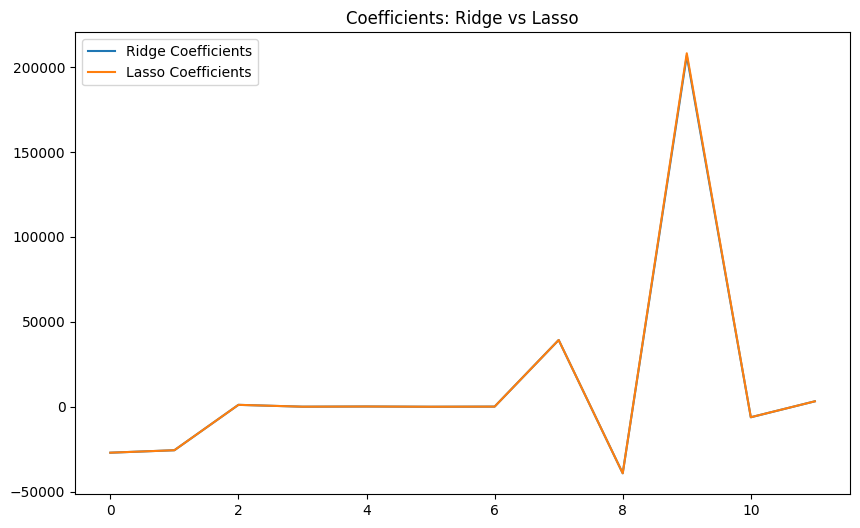

In [ ]:
import matplotlib.pyplot as plt

# Coefficients for Ridge and Lasso
ridge_coef = ridge_best.coef_
lasso_coef = lasso_best.coef_

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.plot(ridge_coef, label="Ridge Coefficients")
plt.plot(lasso_coef, label="Lasso Coefficients")
plt.legend()
plt.title("Coefficients: Ridge vs Lasso")
plt.show()

# Bias-variance tradeoff discussion
# Ridge regularization reduces variance by shrinking coefficients, while Lasso can completely eliminate some features by setting their coefficients to zero.
# Excessive regularization may result in high bias and underfitting.


Part 2: Classification Task (Breast Cancer)

4.1 Task 1: Load and Split Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load Breast Cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Split the dataset into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4.2 Task 2: Complete all the Tasks

Step 1: Baseline Model (No Regularization)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression model (no regularization)
log_reg = LogisticRegression(solver='liblinear')  # default solver is 'lbfgs', changed to 'liblinear' for smaller datasets

# Train the model
log_reg.fit(X_train, y_train)

# Predictions
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Accuracy for both training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print coefficients and accuracy
print("Model Coefficients:", log_reg.coef_)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Model Coefficients: [[ 2.13248406e+00  1.52771940e-01 -1.45091255e-01 -8.28669349e-04
  -1.42636015e-01 -4.15568847e-01 -6.51940282e-01 -3.44456106e-01
  -2.07613380e-01 -2.97739324e-02 -5.00338038e-02  1.44298427e+00
  -3.03857384e-01 -7.25692126e-02 -1.61591524e-02 -1.90655332e-03
  -4.48855442e-02 -3.77188737e-02 -4.17516190e-02  5.61347410e-03
   1.23214996e+00 -4.04581097e-01 -3.62091502e-02 -2.70867580e-02
  -2.62630530e-01 -1.20898539e+00 -1.61796947e+00 -6.15250835e-01
  -7.42763610e-01 -1.16960181e-01]]
Training Accuracy: 0.9582417582417583
Test Accuracy: 0.956140350877193


Step 2: Hyperparameter Tuning for Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define grid of hyperparameters
param_grid = {
    'C': np.logspace(-4, 4, 9),  # Regularization strength
    'penalty': ['l1', 'l2']      # L1 vs L2 regularization
}
log_reg_best = LogisticRegression(C=best_C, penalty=best_penalty, solver='lbfgs')

# GridSearchCV for Logistic Regression
log_reg_grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
log_reg_grid.fit(X_train, y_train)

# Best hyperparameters
best_C = log_reg_grid.best_params_['C']
best_penalty = log_reg_grid.best_params_['penalty']

# Train Logistic Regression with best parameters
log_reg_best = LogisticRegression(C=best_C, penalty=best_penalty, solver='liblinear')
log_reg_best.fit(X_train, y_train)

# Predictions and accuracy
y_test_pred_best = log_reg_best.predict(X_test)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)

# Print the best hyperparameters and accuracy
print("Best C:", best_C)
print("Best Penalty:", best_penalty)
print("Test Accuracy with Best Hyperparameters:", test_accuracy_best)


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best C: 100.0
Best Penalty: l1
Test Accuracy with Best Hyperparameters: 0.9824561403508771


Step 3: Regularization Experiments (L1 vs L2)

In [ ]:
# Coefficients for L1 and L2 regularization
log_reg_l1 = LogisticRegression(C=best_C, penalty='l1', solver='liblinear')
log_reg_l2 = LogisticRegression(C=best_C, penalty='l2', solver='liblinear')

# Fit both models
log_reg_l1.fit(X_train, y_train)
log_reg_l2.fit(X_train, y_train)

# Compare coefficients
l1_coef = log_reg_l1.coef_
l2_coef = log_reg_l2.coef_

# Print coefficients
print("L1 Coefficients:", l1_coef)
print("L2 Coefficients:", l2_coef)

# Accuracy comparison
y_test_pred_l1 = log_reg_l1.predict(X_test)
y_test_pred_l2 = log_reg_l2.predict(X_test)

accuracy_l1 = accuracy_score(y_test, y_test_pred_l1)
accuracy_l2 = accuracy_score(y_test, y_test_pred_l2)

print("Accuracy with L1 Regularization:", accuracy_l1)
print("Accuracy with L2 Regularization:", accuracy_l2)

# Discuss the effect of L1/L2 regularization:
# L1 regularization (Lasso) leads to sparse coefficients (some coefficients set to zero), which may result in feature selection.
# L2 regularization (Ridge) shrinks all coefficients but does not eliminate them, reducing overfitting but not performing feature selection.


L1 Coefficients: [[ 7.03201461e-01 -1.07683973e-01  9.76837779e-02 -1.79313199e-03
   0.00000000e+00  4.73242582e+01 -1.19714639e+01 -1.36007394e+02
   1.98175319e+01  0.00000000e+00  0.00000000e+00  1.72869670e+00
   0.00000000e+00 -1.97677328e-01  0.00000000e+00  0.00000000e+00
   5.00149275e+01  0.00000000e+00  1.86020080e+01  0.00000000e+00
   2.14089102e-01 -4.38982074e-01  5.69218990e-02 -2.10612472e-02
  -2.17310749e+01  7.98539185e+00 -1.46186274e+01 -2.52471085e+01
  -2.53547717e+01  0.00000000e+00]]
L2 Coefficients: [[ 5.40272741  0.26573732 -0.52651203 -0.02095479 -2.29922151 -0.2169419
  -3.56980218 -5.0110607  -2.26418385  0.36762747 -0.58036525  3.84169255
  -0.63875637 -0.10714305 -0.40591246  3.57237002  4.36577514 -0.26636925
   0.39354765  0.62630698 -0.20718582 -0.68999884  0.17661962 -0.01813087
  -4.67716843 -0.0140846  -4.46493229 -7.61271125 -6.83571871  0.57463274]]
Accuracy with L1 Regularization: 0.9824561403508771
Accuracy with L2 Regularization: 0.9561403508

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the grid of alpha values (regularization strength)
alpha_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

# Ridge model
ridge_model = Ridge()

# GridSearchCV
ridge_grid = GridSearchCV(
    ridge_model,
    param_grid=alpha_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Fit on scaled data
ridge_grid.fit(x_train_scaled, y_train_scaled)

print("Best Ridge alpha:", ridge_grid.best_params_)

# Best model predictions
best_ridge = ridge_grid.best_estimator_
y_train_pred_ridge = best_ridge.predict(x_train_scaled)
y_test_pred_ridge = best_ridge.predict(x_test_scaled)

# MSE on scaled target (teacher style)
train_mse_ridge = mean_squared_error(y_train_scaled, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test_scaled, y_test_pred_ridge)

print(f"Ridge Training MSE: {train_mse_ridge:.3f}")
print(f"Ridge Test MSE: {test_mse_ridge:.3f}")


Best Ridge alpha: {'alpha': 10}
Ridge Training MSE: 0.354
Ridge Test MSE: 0.363
